In [ ]:
pip install --upgrade mxnet

In [ ]:
pip install --upgrade gluoncv

In [1]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord

In [2]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('simple_pose_resnet18_v1b', pretrained=True)

# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

88993KB [00:03, 25752.21KB/s]                           


55763KB [00:02, 23091.20KB/s]                           


In [3]:
x, img = data.transforms.presets.ssd.load_test('/content/Pic1.jpg', short=512)
print('Shape of pre-processed image:', x.shape)
class_IDs, scores, bounding_boxs = detector(x)

Shape of pre-processed image: (1, 3, 695, 512)


In [4]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [5]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

In [6]:
confidence # confidence scores of each key points 0-17


[[[0.94512373]
  [0.9692065 ]
  [0.9391755 ]
  [0.9481193 ]
  [0.9688126 ]
  [0.87202394]
  [0.8853219 ]
  [0.86799455]
  [0.88749593]
  [0.8024441 ]
  [0.93268734]
  [0.77688277]
  [0.72325844]
  [0.8830883 ]
  [0.71608347]
  [0.5746118 ]
  [0.34432155]]]
<NDArray 1x17x1 @cpu(0)>

In [15]:
import numpy as np
conf = confidence.asnumpy()
# The lowest confidence point
print(f'Point № {np.argmin(conf[0])}, with confidence score = {np.min(conf[0])}')
print(f'Mean confidence score for all points = {np.mean(conf[0])}')

Point № 16, with confidence score = 0.3443215489387512
Mean confidence score for all points = 0.8256853222846985


In [14]:
# coordinates to numpy
pred_coords_np = pred_coords.asnumpy()
pred_coords_np = np.array(pred_coords_np, dtype='uint16')

In [16]:
pred_coords_np = pred_coords_np[0]
pred_coords_np # x, y of each point

array([[278,  97],
       [288,  88],
       [269,  88],
       [306,  88],
       [250,  97],
       [343, 168],
       [223, 159],
       [362, 256],
       [158, 230],
       [353, 327],
       [ 92, 177],
       [325, 336],
       [250, 336],
       [316, 469],
       [260, 469],
       [241, 548],
       [250, 557]], dtype=uint16)

In [22]:
pair_points = ((5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12), (11, 13), (12, 14), (13, 15), (14, 16))

In [26]:
for pair in pair_points:
  p_1 = pair[0]
  p_2 = pair[1]
  cv2.line(img, (pred_coords_np[p_1][0], pred_coords_np[p_1][1]), (pred_coords_np[p_2][0], pred_coords_np[p_2][1]), [0,120,255], 3)

In [28]:
import cv2
# draw points
for p in pred_coords_np:
  cv2.circle(img, (int(p[0]), int(p[1])), 4, [255, 255, 0], -1)

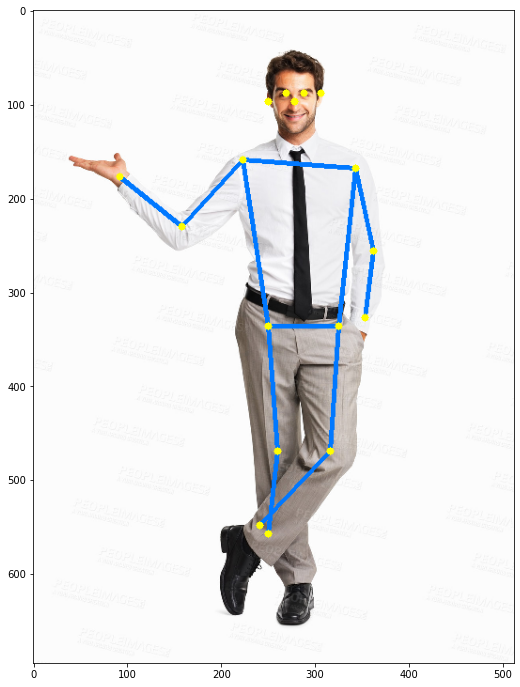

In [29]:
plt.figure(figsize=(20, 12))
plt.imshow(img)